In [99]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

In [100]:
# describe the model
def deriv(y, t, N, beta, k, delta, q):
    S, E, V, I, R = y             # Susceptible, Exposed, Vaccinated, Infected, Recovered
    dSdt = -beta * S * I / N - epsilon(I) * S
    dEdt = beta * S * I / N - gamma * E - epsilon(I) * E
    dVdt = epsilon(I) * (S + E)
    dIdt = gamma * E - delta * I
    dRdt = delta * I + epsilon(I) * (S + E)
    return dSdt, dEdt, dVdt, dIdt, dRdt

In [101]:
# describe the parameters
N =  1244                      # population, (S + I + R + E = N)
beta = 2.5                     # rate of infection
gamma = 1/7                    # incubation period  
delta = 1/5                    # rate of recovery

S0, E0, V0, I0, R0 = N-1, 0, 0, 1, 0  # initial conditions: one infected

In [102]:
seed = np.random.uniform(0.1, 0.2)  #generate a pseudo-random float
def epsilon(n):                
    global seed
    if n > N * seed:           # vaccination starts when x% of the population is infected (varies)
        return 0.1             # vaccine effectivity / percentage of S+E vaccinated
    else:
        return 0

In [103]:
t = np.linspace(0, 99, 100) # Grid of time points (in days)
y0 = S0, E0, V0, I0, R0 # Initial conditions vector

# Integrate the SIREV equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta, epsilon))
S, E, V, I, R = ret.T

In [104]:
def plotsir(t, S, E, V, I, R):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
  ax.plot(t, V, 'purple', alpha=0.7, linewidth=2, label='Vaccinated')
  ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')

  ax.set_xlabel('Time (days)')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.savefig("Plot.png")
  plt.show()

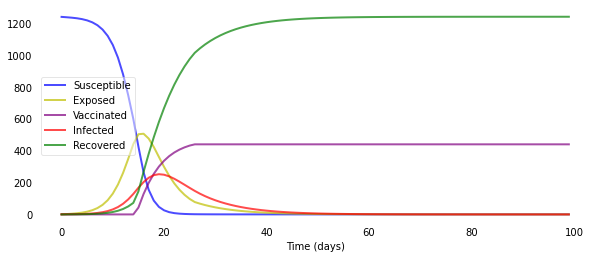

In [105]:
#plot the graph
plotsir(t, S, E, V, I, R)